<a href="https://colab.research.google.com/github/Darshan2082002/Machine_learning_projects/blob/main/SVM_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Load a classification dataset, apply dimensionality reduction (e.g., PCA), train an SVM model on the reduced data, evaluate its performance, visualize the dimensionally reduced data and the SVM's decision boundary, and finally, summarize the findings.

## Load Dataset

### Subtask:
Load a suitable dataset for classification, such as the Iris or Digits dataset from scikit-learn, to demonstrate the process.


**Reasoning**:
To load the Iris dataset, I need to import the `load_iris` function from `sklearn.datasets` and then call it to get the feature matrix `X` and target vector `y`.



In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

print("Iris dataset loaded successfully.")
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Iris dataset loaded successfully.
Shape of features (X): (150, 4)
Shape of target (y): (150,)


## Apply Dimensionality Reduction

### Subtask:
Apply a dimensionality reduction technique, such as Principal Component Analysis (PCA), to reduce the features of the dataset while retaining most of the variance. Specify the number of components to reduce the data to (e.g., 2 or 3 for visualization).


**Reasoning**:
To apply PCA, I need to import the PCA class, instantiate it with 2 components for visualization, fit it to the existing feature data `X`, and then transform `X` into a reduced-dimension dataset `X_reduced`.



In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components for 2D visualization
pca = PCA(n_components=2)

# Fit PCA to the data and transform it
X_reduced = pca.fit_transform(X)

print(f"Original feature shape: {X.shape}")
print(f"Reduced feature shape: {X_reduced.shape}")

Original feature shape: (150, 4)
Reduced feature shape: (150, 2)


## Train SVM Model

### Subtask:
Split the dimensionally reduced data into training and testing sets. Then, train a Support Vector Machine (SVM) classifier on the training data.


**Reasoning**:
To prepare the data for training and evaluation, I will split the dimensionally reduced data into training and testing sets. Then, I will initialize and train a Support Vector Machine (SVM) classifier on the training data.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Initialize the SVC classifier
svm_model = SVC(kernel='rbf', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

print("SVM model trained successfully.")

Shape of X_train: (105, 2)
Shape of X_test: (45, 2)
Shape of y_train: (105,)
Shape of y_test: (45,)
SVM model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the performance of the trained SVM model on the test set using appropriate metrics like accuracy, and generate a classification report.


**Reasoning**:
To evaluate the SVM model's performance, I will import necessary metrics, make predictions on the test set, calculate accuracy, and generate a classification report.



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9778

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



## Visualize Data and Decision Boundary

### Subtask:
Visualize the dimensionally reduced data. Plot the data points, colored by their respective classes. Additionally, plot the SVM's decision boundary on this 2D plane.


**Reasoning**:
To visualize the data and the SVM decision boundary, I need to import `matplotlib.pyplot` and `numpy`. I will then create a meshgrid to plot the decision boundary and scatter plot the reduced data points colored by their true labels.



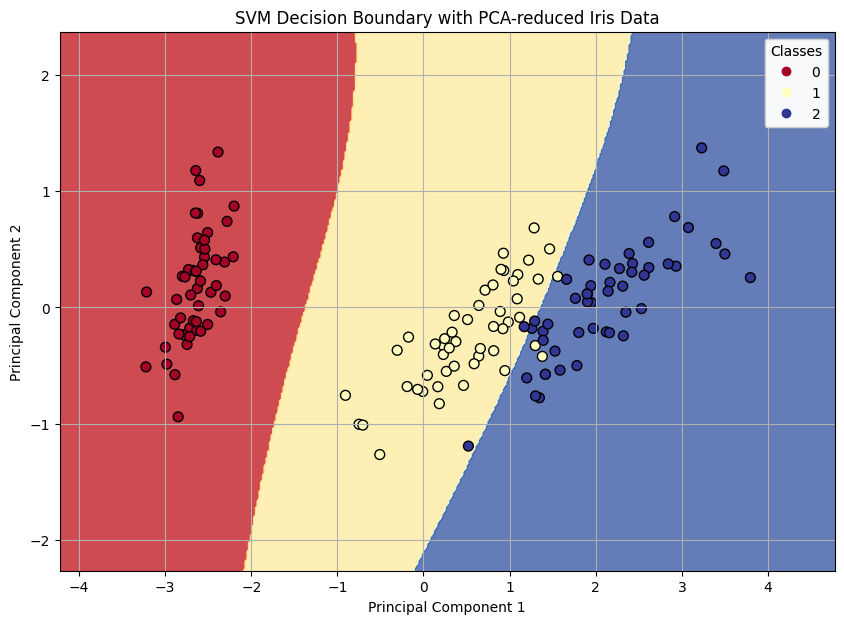

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get min, max, and range for X and Y
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot actual data points
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.RdYlBu, s=50, edgecolors='k')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA-reduced Iris Data')

# Create a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.grid(True)
plt.show()



## Final Task

### Subtask:
Summarize the steps taken, the performance of the SVM model with dimensionality reduction, and any insights gained from the visualization.


## Summary:

### Data Analysis Key Findings
*   The Iris dataset, consisting of 150 samples with 4 features, was successfully loaded.
*   Principal Component Analysis (PCA) was applied to reduce the dataset's dimensionality from 4 features to 2 principal components, maintaining its structure for visualization and classification.
*   The data was split into training (105 samples) and testing (45 samples) sets. A Support Vector Machine (SVM) classifier with an RBF kernel was trained on the reduced training data.
*   The SVM model achieved a high accuracy of 0.9778 on the test set.
*   Detailed evaluation showed robust performance across classes:
    *   Class 0 achieved perfect precision, recall, and f1-score (1.00).
    *   Class 1 achieved a precision of 0.93, recall of 1.00, and f1-score of 0.96.
    *   Class 2 achieved a precision of 1.00, recall of 0.92, and f1-score of 0.96.
*   The visualization of the PCA-reduced data clearly showed the three Iris classes largely separable in 2D space, with the SVM's decision boundary effectively segmenting these regions, confirming the model's strong performance.

### Insights or Next Steps
*   The combination of PCA for dimensionality reduction and SVM for classification on the Iris dataset proves highly effective, achieving near-perfect separation and classification with a 97.78% accuracy. This suggests that the two principal components capture the essential variance for distinguishing between Iris species.
*   For future work, exploring different numbers of PCA components or alternative dimensionality reduction techniques (e.g., t-SNE for non-linear structures) could be beneficial, especially if dealing with more complex datasets where linear separation after PCA might not be as effective. Additionally, fine-tuning SVM hyperparameters could potentially lead to marginal improvements in performance.
